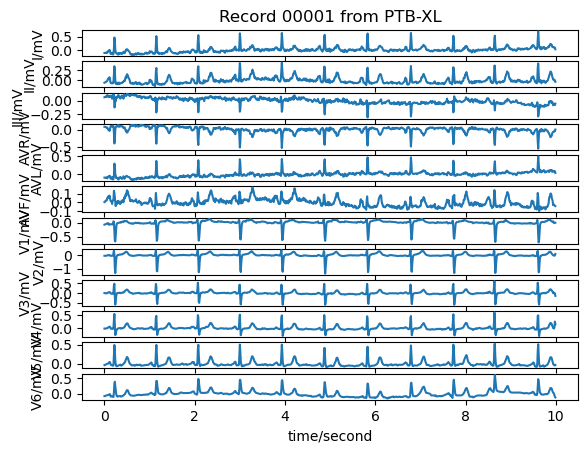

In [27]:
import matplotlib.pyplot as plt
#%matplotlib inline
from IPython.display import display
import numpy as np
import os
import shutil
import posixpath
import wfdb
import pandas as pd
import ast
# read flash.dat to a list of lists
#datContent = [i.strip().split() for i in open("./00001_lr.dat").readlines()]
record = wfdb.rdrecord('C:/records100/00000/00001_lr')
print(record)

wfdb.plot_wfdb(record=record, title='Record 00001 from PTB-XL') 

In [4]:

display(record.__dict__)


{'record_name': '00001_lr',
 'n_sig': 12,
 'fs': 100,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 1000,
 'base_time': None,
 'base_date': None,
 'comments': [],
 'sig_name': ['I',
  'II',
  'III',
  'AVR',
  'AVL',
  'AVF',
  'V1',
  'V2',
  'V3',
  'V4',
  'V5',
  'V6'],
 'p_signal': array([[-0.119, -0.055,  0.064, ..., -0.026, -0.039, -0.079],
        [-0.116, -0.051,  0.065, ..., -0.031, -0.034, -0.074],
        [-0.12 , -0.044,  0.076, ..., -0.028, -0.029, -0.069],
        ...,
        [ 0.069,  0.   , -0.069, ...,  0.024, -0.041, -0.058],
        [ 0.086,  0.004, -0.081, ...,  0.242, -0.046, -0.098],
        [ 0.022, -0.031, -0.054, ...,  0.143, -0.035, -0.12 ]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['00001_lr.dat',
  '00001_lr.dat',
  '00001_lr.dat',
  '00001_lr.dat',
  '00001_lr.dat',
  '00001_lr.dat',
  '00001_lr.dat',
  '00001_lr.dat',
  '00001_lr.dat',
  '00001_lr.dat',
  '00001_lr.dat',
  '00001_lr.dat'],
 'fmt': ['16',
  

In [31]:
df=pd.DataFrame(record.p_signal, columns=record.sig_name)
print(df.head())
# write it as a new CSV file
df.to_csv('R0001_lr.csv', index=False)
"""with open("./flash.csv", "wb") as f:
    writer = csv.writer(f)
    writer.writerows(datContent)"""

       I     II    III    AVR    AVL    AVF     V1     V2     V3     V4  \
0 -0.119 -0.055  0.064  0.086 -0.091  0.004 -0.069 -0.031  0.000 -0.026   
1 -0.116 -0.051  0.065  0.083 -0.090  0.006 -0.064 -0.036 -0.003 -0.031   
2 -0.120 -0.044  0.076  0.082 -0.098  0.016 -0.058 -0.034 -0.010 -0.028   
3 -0.117 -0.038  0.080  0.077 -0.098  0.021 -0.050 -0.030 -0.015 -0.023   
4 -0.103 -0.031  0.072  0.066 -0.087  0.021 -0.045 -0.027 -0.020 -0.019   

      V5     V6  
0 -0.039 -0.079  
1 -0.034 -0.074  
2 -0.029 -0.069  
3 -0.022 -0.064  
4 -0.018 -0.058  


'with open("./flash.csv", "wb") as f:\n    writer = csv.writer(f)\n    writer.writerows(datContent)'

In [32]:
df

,I,II,III,AVR,AVL,AVF,V1,V2,V3,V4,V5,V6
0,-0.119,-0.055,0.064,0.086,-0.091,0.004,-0.069,-0.031,0.000,-0.026,-0.039,-0.079
1,-0.116,-0.051,0.065,0.083,-0.090,0.006,-0.064,-0.036,-0.003,-0.031,-0.034,-0.074
2,-0.120,-0.044,0.076,0.082,-0.098,0.016,-0.058,-0.034,-0.010,-0.028,-0.029,-0.069
3,-0.117,-0.038,0.080,0.077,-0.098,0.021,-0.050,-0.030,-0.015,-0.023,-0.022,-0.064
4,-0.103,-0.031,0.072,0.066,-0.087,0.021,-0.045,-0.027,-0.020,-0.019,-0.018,-0.058
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.106,0.028,-0.078,-0.067,0.092,-0.025,0.012,-0.008,0.025,0.020,-0.025,0.026
996,0.090,0.021,-0.069,-0.055,0.079,-0.023,-0.014,-0.009,-0.023,-0.027,-0.036,-0.008
997,0.069,0.000,-0.069,-0.034,0.069,-0.035,-0.001,-0.026,0.000,0.024,-0.041,-0.058
998,0.086,0.004,-0.081,-0.044,0.083,-0.038,0.001,-0.001,-0.025,0.242,-0.046,-0.098


In [86]:
first_signal = df.iloc[:, 0]
summary_stats = first_signal.describe()
print(summary_stats)

count    1000.000000
mean        0.001508
std         0.109077
min        -0.195000
25%        -0.049000
50%        -0.009000
75%         0.031250
max         0.706000
Name: I, dtype: float64


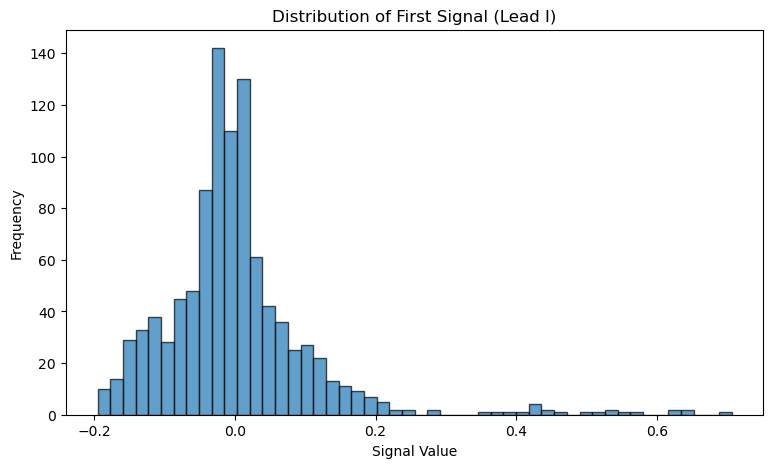

In [91]:
# Plot Histogram
plt.figure(figsize=(9, 5))
plt.hist(first_signal, bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of First Signal (Lead I)')
plt.xlabel('Signal Value')
plt.ylabel('Frequency')
plt.show()

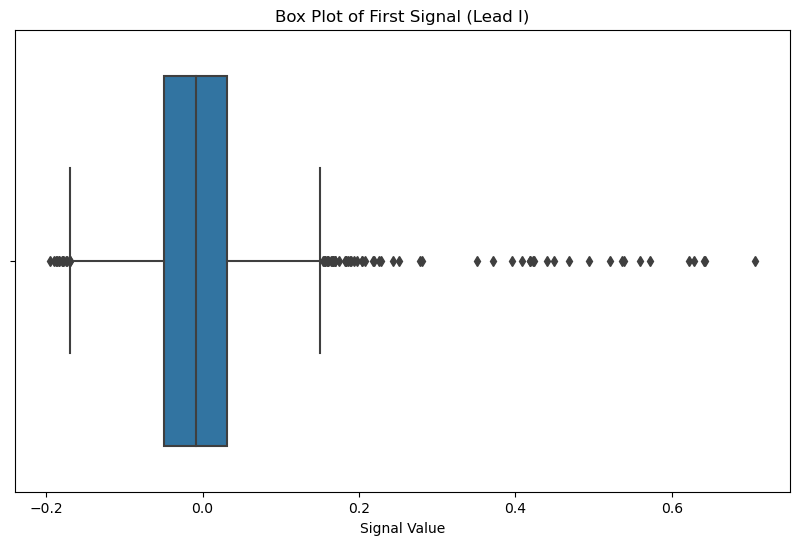

In [93]:
# Plot Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=first_signal)
plt.title('Box Plot of First Signal (Lead I)')
plt.xlabel('Signal Value')
plt.show()

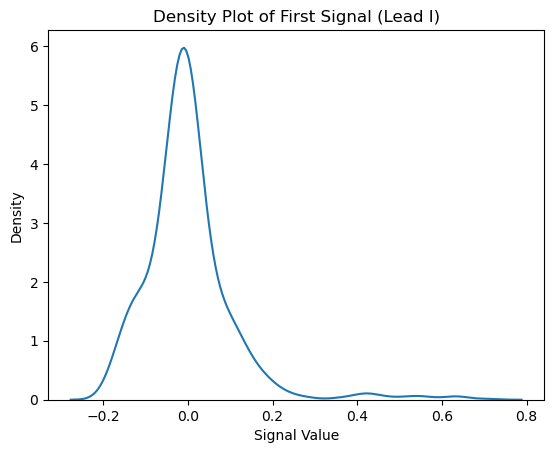

In [96]:
# Density Plot for the First Signal (Lead I)
sns.kdeplot(first_signal)
plt.title('Density Plot of First Signal (Lead I)')
plt.xlabel('Signal Value')
plt.ylabel('Density')
plt.show()

In [48]:
import pandas as pd
ptb = pd.read_csv('C:/records100/ptbxl_database.csv')
print(ptb.head())

   ecg_id  patient_id   age  sex  height  weight  nurse  site     device  \
0       1     15709.0  56.0    1     NaN    63.0    2.0   0.0  CS-12   E   
1       2     13243.0  19.0    0     NaN    70.0    2.0   0.0  CS-12   E   
2       3     20372.0  37.0    1     NaN    69.0    2.0   0.0  CS-12   E   
3       4     17014.0  24.0    0     NaN    82.0    2.0   0.0  CS-12   E   
4       5     17448.0  19.0    1     NaN    70.0    2.0   0.0  CS-12   E   

        recording_date  ... validated_by_human  baseline_drift static_noise  \
0  1984-11-09 09:17:34  ...               True             NaN    , I-V1,     
1  1984-11-14 12:55:37  ...               True             NaN          NaN   
2  1984-11-15 12:49:10  ...               True             NaN          NaN   
3  1984-11-15 13:44:57  ...               True    , II,III,AVF          NaN   
4  1984-11-17 10:43:15  ...               True   , III,AVR,AVF          NaN   

  burst_noise electrodes_problems  extra_beats  pacemaker  strat_fol

In [49]:
#As we want to classify our analysis on age and sex, extarcing the required columns from the dataset
extracted_data = ptb[['age', 'sex']]

In [50]:
extracted_data

,age,sex
0,56.0,1
1,19.0,0
2,37.0,1
3,24.0,0
4,19.0,1
...,...,...
21794,67.0,1
21795,300.0,0
21796,59.0,1
21797,64.0,1


In [51]:
#Taking the I and III signals data for analysis from the 12 lead signals
df_extract_data=df[['I','III']]

In [52]:
df_extract_data

,I,III
0,-0.119,0.064
1,-0.116,0.065
2,-0.120,0.076
3,-0.117,0.080
4,-0.103,0.072
...,...,...
995,0.106,-0.078
996,0.090,-0.069
997,0.069,-0.069
998,0.086,-0.081


In [66]:
#Taking the records correscponding to the records100/00000
extracted_data_999=extracted_data.head(987)

In [67]:
extracted_data_999

,age,sex
0,56.0,1
1,19.0,0
2,37.0,1
3,24.0,0
4,19.0,1
...,...,...
982,86.0,1
983,85.0,1
984,85.0,1
985,80.0,0


In [68]:
#Checking if any missing value is present in the extracted dataset or not
missing_data = extracted_data_999[extracted_data_999.isnull().any(axis=1)]

In [69]:
missing_data

,age,sex


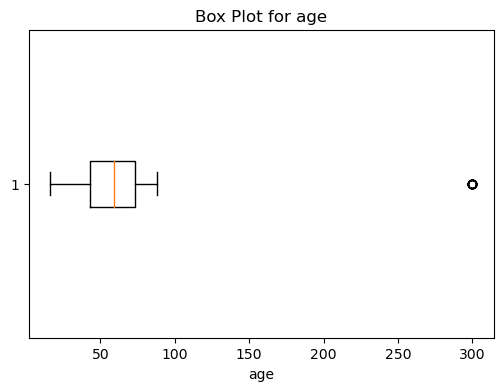

In [78]:
# Plotting the box plot for identifying outlier in age 
age = 'age'
plt.figure(figsize=(6, 4))
plt.boxplot(extracted_data_999['age'], vert=False)  # 'vert=False' for horizontal box plot
plt.title('Box Plot for ' + age)
plt.xlabel(age)
plt.show()

In [83]:
df_cleaned = extracted_data_999[extracted_data_999[age] != 300]

In [84]:
df_cleaned

,age,sex
0,56.0,1
1,19.0,0
2,37.0,1
3,24.0,0
4,19.0,1
...,...,...
982,86.0,1
983,85.0,1
984,85.0,1
985,80.0,0
